{4: [(4, 1), (5, 4), (4, 0), (9, 4), (8, 4)], 1: [(4, 1), (1, 5), (0, 1), (1, 2)], 5: [(1, 5), (5, 4), (2, 5), (6, 5), (5, 9), (10, 5)], 0: [(0, 1), (4, 0)], 3: [(3, 7), (2, 3)], 7: [(3, 7), (7, 2), (7, 6), (7, 10), (7, 11)], 2: [(7, 2), (2, 3), (6, 2), (1, 2), (2, 5)], 6: [(7, 6), (6, 2), (6, 5), (6, 10)], 9: [(9, 4), (5, 9), (9, 8), (9, 13), (10, 9), (9, 14)], 8: [(9, 8), (8, 4), (12, 8), (8, 13)], 12: [(12, 8), (13, 12)], 13: [(8, 13), (13, 12), (9, 13), (14, 13)], 10: [(6, 10), (10, 5), (10, 9), (7, 10), (11, 10), (14, 10)], 11: [(7, 11), (11, 10), (14, 11), (11, 15)], 14: [(14, 11), (15, 14), (14, 10), (14, 13), (9, 14)], 15: [(11, 15), (15, 14)]}


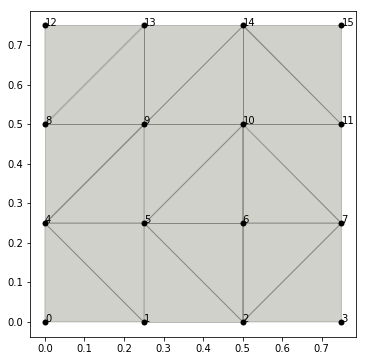

In [68]:
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib.tri import Triangulation
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import numpy as np



def get_triangle_edge_neighbors(T):
    '''
    Function to determine the neighbouring elements of an edge in a triangular mesh
    
    Input:
        T: 3 x N dimensional list with triangle node indices for mesh with N 
           triangles
    Output:
        edges: dictionary - keys are two node indices, that define a triangles edge
               every key has a list of two values, which are the adjacent triangles 
               to the edge. If the last value is -1, the edge is located at the boundary
               
    '''
    edges = {}
    # Loop over all triangles
    for iTri, tri in enumerate(T):
        # Loop over all current edges
        for iE in range(3):
            edge = (tri[iE], tri[(iE+1)%3])
            
            # Check if edge is already in dictionary
            if (edge in edges) or (edge[::-1] in edges):
                try:
                    edges[edge][1] = iTri
                except:
                    edges[edge[::-1]][1] = iTri
            else:
                edges.update({edge:[iTri, -1]})
    return edges
            
    
def get_triangle_node_neighbors(T):
    '''
    Function to determine the triangles, that are adjacent to a node in the triangular mesh.
    
    Input:
        T: 3 x N dimensional list with triangle node indices for mesh with N 
           triangles
    Output:
        nodes: dictionary - keys are the mesh nodes - their values are the indices of their
               adjacent triangular elements

    '''
    nodes = {}
    # Loop over all triangles
    for iTri, tri in enumerate(T):
        # Loop over all triangle nodes
        for n in tri:
            if n in nodes:
                nodes[n].append(iTri)
            else:
                nodes.update({n: [iTri]})
    return nodes
            
            
def get_node_edge_neighbors(E):
    '''
    Function determines which edges are adjacent to the mesh nodes
    
    Input: edge-dictionary from "get_triangle_edge_neighbors"-function
    
    Output:
        nodes: dictionary - keys are the mesh nodes - their values are the indices of their
               adjacent mesh-edges
    
    '''
    nodes = {}
    # Loop over all edges
    for edg in E:
        # Loop over all nodes of the respective edge
        for n in edg:
            if n in nodes:
                nodes[n].append(edg)
            else:
                nodes.update({n: [edg]})
    return nodes
        




x0 = (0, 1)
y0 = (0, 1)
h = 0.25
Nx = int((x0[1]-x0[0])/h)
Ny = int((x0[1]-x0[0])/h)

x = [x0[0] + i*h for j in range(Nx) for i in range(Ny)]
y = [y0[0] + j*h for j in range(Nx) for i in range(Ny)]

# Create triangular mesh
#------------------------------------------------------
T = Triangulation(x, y)
E2T = get_triangle_edge_neighbors(T.triangles[:])
N2T = get_triangle_node_neighbors(T.triangles[:])
N2E = get_node_edge_neighbors(E)
print(N2E)

fig = plt.figure()
fig.set_size_inches(6,6)
ax = fig.add_subplot(111)
ax.set_aspect('equal')

tri_patches = []
for tri in T.triangles:
    poly = Polygon([[x[iNode], y[iNode]] for iNode in tri])
    tri_patches.append(poly)
    
for i in range(len(x)):
    ax.plot(x[i], y[i], marker='o', mfc='k',mec='None')
    ax.text(x[i], y[i], str(i))
    
tri_patchCol = PatchCollection(tri_patches, alpha=0.2, facecolor=[.1,.1,.0], edgecolor='k')
ax.add_collection(tri_patchCol)
plt.show()

In [63]:
a = {1 : [1,2]}
a[1].append(1)
print(a)

{1: [1, 2, 1]}
